In [1]:
import sys
sys.path.append('../Modules')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from Kernel import RBF, GaussianProcessRegressor
def sinusoidal(x):
    return np.sin(2 * np.pi * x)

def create_data_3d(func, n=10, std=1.):
    x0 = np.linspace(0, 1, n)
    x1 = x0 + np.random.normal(scale=std, size=n)
    x2 = np.random.normal(scale=std, size=n)
    t = func(x0) + np.random.normal(scale=std, size=n)
    return np.vstack((x0, x1, x2)).T, t

The example in 6.4.4. We incorporate a separate parameter for each input variable. The optimization of these parameters by maximum likelihood allows the relative importance of different inputs to be inferred from the data. This represents an example
in the Gaussian process context of automatic relevance determination, or ARD.

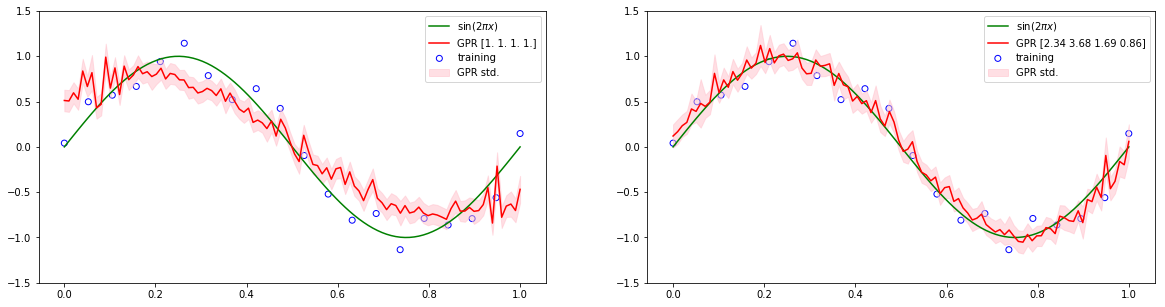

In [2]:
x_train, t_train = create_data_3d(sinusoidal, n=20, std=0.1)
x0 = np.linspace(0, 1, 100)
x1 = x0 + np.random.normal(scale=0.1, size=100)
x2 = np.random.normal(scale=0.1, size=100)
x = np.vstack((x0, x1, x2)).T

model = GaussianProcessRegressor(kernel=RBF(np.array([1., 1., 1., 1.])), beta=100)
model.fit(x_train, t_train, iter_max=0)
t, t_std = model.predict(x, with_error=True)
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 0], t_train, facecolor="none", edgecolor="b", label="training")
plt.plot(x[:, 0], sinusoidal(x[:, 0]), color="g", label="$\sin(2\pi x)$")
plt.plot(x[:, 0], t, color="r", label="GPR {}".format(model.kernel.params))
plt.fill_between(x[:, 0], t - t_std, t + t_std, color="pink", alpha=0.5, label="GPR std.")
plt.legend()
plt.ylim(-1.5, 1.5)

model.fit(x_train, t_train, iter_max=100, learning_rate=0.001)
t, t_std = model.predict(x, with_error=True)
plt.subplot(1, 2, 2)
plt.scatter(x_train[:, 0], t_train, facecolor="none", edgecolor="b", label="training")
plt.plot(x[:, 0], sinusoidal(x[:, 0]), color="g", label="$\sin(2\pi x)$")
plt.plot(x[:, 0], t, color="r", label="GPR {}".format(np.round(model.kernel.params, 2)))
plt.fill_between(x[:, 0], t - t_std, t + t_std, color="pink", alpha=0.5, label="GPR std.")
plt.legend()
plt.ylim(-1.5, 1.5)
plt.show()